In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *

os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

# set initial parameters
M = 1e6
m = 1e1
mu = 5e-18
a = 0.9
p0 = 14.0
e0 = 0.2
iota0 = 0.1
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 50.0
T = 10.0

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))

alpha = 0.03741569030786112


# Without Proca

In [2]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 1,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wfgenerator = EMRIWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)
withoutproca = wfgenerator(M, m, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)


11.489277746444351
11.48927772215032
11.489277479210308
11.489275049804986
11.489250755685628
11.4890078073771
11.486577612674184
11.4622041821737
11.210981327849138
10.930412089928708
10.630731383809717
10.30866358850254
9.959953779978587
9.578919215886803
9.157703920657635
8.684959286942764
8.143310011055378
7.542827276166419


/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few-1.4.6-py3.7-linux-x86_64.egg/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."


# With Proca

In [3]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 1,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wfgen = EMRIWithProcaWaveform()
withproca = wfgen(M,m,mu,a,p0,e0,Y0,T=T,qS=qS,phiS=phiS,qK=qK,phiK=phiK,dist=dist,mich=mich)

11.48927774300919
11.489277684366009
11.489277097928236
11.489271233550184
11.489212589719333
11.488626146242861
11.48276119226732
11.424057503042361
10.829613831319497
10.18249532586551
9.502504883003148
8.774948020551683
7.97690411989765
7.067422919769079
5.958817235207629
4.388383880760383
3.2008048389062065
2.361033009944808
1.8044924335575665
1.2352191456732475
0.9907336381335043
0.8201909988350047
0.7583312292460502
0.7319954690974386
0.7195186295110116
0.7176293539447722
0.7172843203490538
0.7166427465553591
0.7169443293106954
0.7165791817943168
0.7169115647023374
0.7165661679677022
0.7169017099768173
0.7165620487855451
0.7169010797396931
0.716562050913395
0.7169009028931663
0.7165619052855079
0.7169008713300142
0.7165619138433916
0.716900872921149
0.7165619097825005
0.7169008708253242
0.7165619099015008
0.7169008711675255
0.7165619098812757
0.7169008710620877
0.7165619098584242
0.7169008710794498
0.7165619098654479
0.7169008710760894
0.7165619098636218
0.7169008710780611
0.7165

/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few-1.4.6-py3.7-linux-x86_64.egg/few/utils/utility.py:110: UserWarning: The two time series are not the same length (6311630 vs 21038767). The calculation will run with length 6311630 starting at index 0 for both arrays.
  len(time_series_1), len(time_series_2), min_len


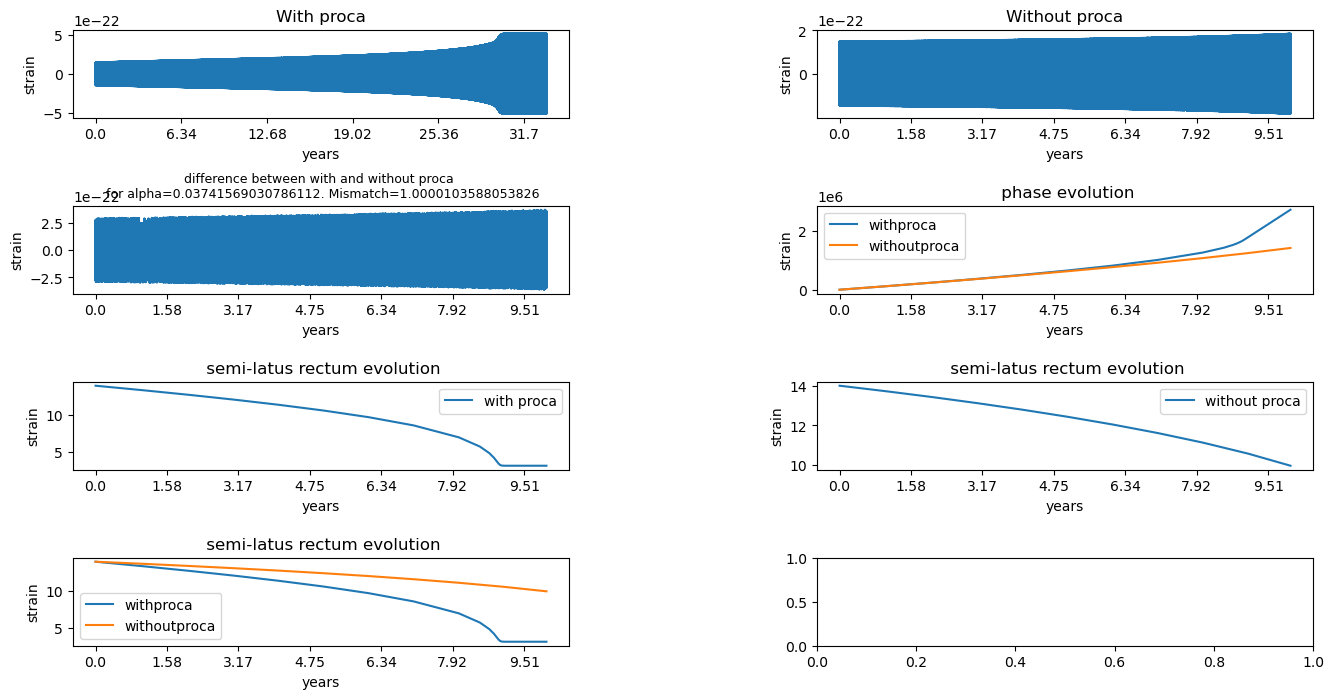

In [4]:
mismatch = get_mismatch(withoutproca, withproca)


tp = np.arange(len(withproca)) * dt;
twp = np.arange(len(withoutproca)) * dt

fig,ax = plt.subplots(4,2, figsize=(16,8))
plt.subplots_adjust(hspace=1, wspace=0.5)
ax[0,0].plot(tp, withproca.real)
ax[0,0].set_title("With proca")
ticks = ax[0,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[0,0].set_xticks(ticks, newlabs);
ax[0,0].set_xlabel("years");
ax[0,0].set_ylabel("strain");

ax[0,1].plot(twp, withoutproca.real)
ax[0,1].set_title("Without proca")
ticks = ax[0,1].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[0,1].set_xticks(ticks, newlabs);
ax[0,1].set_xlabel("years");
ax[0,1].set_ylabel("strain");

minwave = min([len(withproca), len(withoutproca)])
dom =tp[0:minwave-1]
ax[1,0].plot(dom, (withproca.real[0:minwave-1]-withoutproca.real[0:minwave-1]));
ax[1,0].set_title("difference between with and without proca \n for alpha={0}. Mismatch={1}".format(alphaval,mismatch), fontdict={"fontsize":9});
ticks = ax[1,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[1,0].set_xticks(ticks, newlabs);
ax[1,0].set_xlabel("years");
ax[1,0].set_ylabel("strain");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[1,1].plot(wfgen.Trajectory["t"], wfgen.Trajectory["Phi_phi"], label="withproca")
ax[1,1].plot(wfgenerator.Trajectory["t"], wfgenerator.Trajectory["Phi_phi"], label="withoutproca")
ax[1,1].set_title(" phase evolution")
ax[1,1].legend()
ticks = ax[1,1].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[1,1].set_xticks(ticks, newlabs);
ax[1,1].set_xlabel("years");
ax[1,1].set_ylabel("strain");


ax[2,0].plot(wfgen.Trajectory["t"], wfgen.Trajectory["p"], label="with proca")
ax[2,0].set_title(" semi-latus rectum evolution")
ax[2,0].legend()
ticks = ax[2,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[2,0].set_xticks(ticks, newlabs);
ax[2,0].set_xlabel("years");
ax[2,0].set_ylabel("strain");

ax[2,1].plot(wfgenerator.Trajectory["t"], wfgenerator.Trajectory["p"], label="without proca")
ax[2,1].set_title(" semi-latus rectum evolution")
ax[2,1].legend()
ticks = ax[2,1].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[2,1].set_xticks(ticks, newlabs);
ax[2,1].set_xlabel("years");
ax[2,1].set_ylabel("strain");


minsize = min([len(tp), len(twp)])
dom = tp[0:minsize-1]
ax[3,0].plot(wfgen.Trajectory["t"], wfgen.Trajectory["p"], label="withproca")
ax[3,0].plot(wfgenerator.Trajectory["t"], wfgenerator.Trajectory["p"], label="withoutproca")
ax[3,0].set_title(" semi-latus rectum evolution")
ax[3,0].legend()
ticks = ax[3,0].get_xticks()[1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
ax[3,0].set_xticks(ticks, newlabs);
ax[3,0].set_xlabel("years");
ax[3,0].set_ylabel("strain");

In [10]:
wfgen.Trajectory["p"]

array([14.        , 13.99999999, 13.99999994, 13.9999994 , 13.99999398,
       13.99993984, 13.99939838, 13.99398266, 13.9397099 , 13.38439672,
       12.77049598, 12.11705905, 11.40962004, 10.62442014,  9.71807833,
        8.59667796,  6.97625306,  5.72439613,  4.82344719,  4.22259434,
        3.62665682,  3.38265949,  3.21482962,  3.15417161,  3.12837207,
        3.11612168,  3.11436602,  3.113839  ,  3.11348664,  3.11352954,
        3.11338986,  3.1134886 ,  3.11337404,  3.11348092,  3.11337099,
        3.11348006,  3.11337073,  3.1134799 ,  3.11337064,  3.11347988,
        3.11337064,  3.11347987,  3.11337064,  3.11347987,  3.11337064,
        3.11347987,  3.11337064,  3.11347987,  3.11337064,  3.11347987,
        3.11337064,  3.11347987,  3.11337064,  3.11347987,  3.11337064,
        3.11347987,  3.11337064,  3.11347987,  3.11337064,  3.11347987,
        3.11337064,  3.11347987,  3.11337064,  3.11347987,  3.11337064,
        3.11347987,  3.11337064,  3.11347987,  3.11337064,  3.11

In [7]:
[get_separatrix(0.9,i,1.) for i in wfgen.Trajectory["e"]]

[2.5007620045187737,
 2.5007620049687693,
 2.500762009473327,
 2.500762054468654,
 2.500762504472063,
 2.5007670043891137,
 2.50081199732298,
 2.501261300567228,
 2.5056930108274353,
 2.5448383235200587,
 2.578077928814277,
 2.6046537295526293,
 2.6247908516654648,
 2.6376480777772615,
 2.6407908129070226,
 2.6279827735296233,
 2.577946350519443,
 2.5136338090203254,
 2.4524603657784603,
 2.4097607674949417,
 2.3831212842844662,
 2.383608842304551,
 2.386318305903088,
 2.3875186596689666,
 2.3880542668165523,
 2.3882804614734603,
 2.388413921355414,
 2.3882321392750594,
 2.3885210297025177,
 2.3882626387197163,
 2.3884878529392504,
 2.3882544744175824,
 2.3884850548128966,
 2.38825665113449,
 2.3884861153136,
 2.3882564138359865,
 2.3884858561334243,
 2.388256433996917,
 2.3884859168165997,
 2.388256440705506,
 2.3884859052846954,
 2.388256437440467,
 2.388485907205932,
 2.3882564385315876,
 2.388485906997235,
 2.38825643825263,
 2.388485906993078,
 2.3882564383166245,
 2.3884859070055